In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
df_train = pd.read_csv('E:\\OneDrive\\Desktop\\train.csv')
df_train.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [4]:
wrong_values = ['Male' , 'Female' , 'Non-binary' ,' işte mevcut veri kümesini 1000 satıra tamamlıyorum:']
df_train = df_train[~df_train['Age'].isin(wrong_values)]
df_train['Age'] = df_train['Age'].astype('Int64')
df_train['Age'].value_counts()

28    92
27    92
29    90
22    74
26    66
25    64
24    64
31    62
33    56
21    56
30    48
23    48
35    38
32    38
34    36
Name: Age, dtype: Int64

       Gender  Count
0      Female    344
1        Male    332
2  Non-binary    248


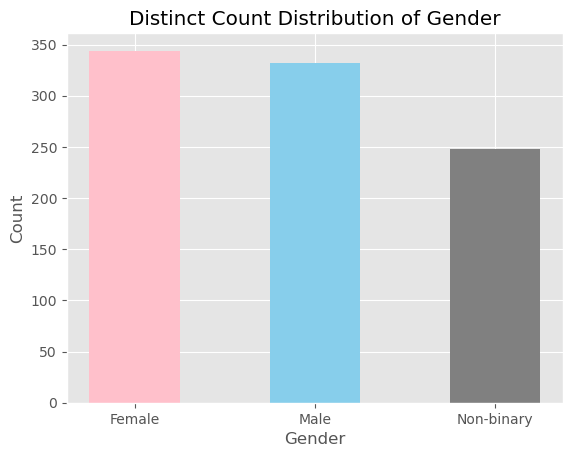

In [5]:
gender_cols = df_train['Gender'].value_counts().reset_index()
gender_cols.columns = ['Gender','Count']
print(gender_cols)
fig , ax = plt.subplots()
ax.bar(gender_cols['Gender'], gender_cols['Count'],color= ['pink','skyblue','grey'] \
      ,width = 0.5)
ax.set_title("Distinct Count Distribution of Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
plt.show()

In [7]:
train_df = pd.read_csv('E:\\OneDrive\\Desktop\\train.csv')
test_df = pd.read_csv('E:\\OneDrive\\Desktop\\test.csv')

In [8]:
def count_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outliers = {}
    for col in numeric_cols:
        upper_limit = df[col].quantile(0.99)
        outliers[col] = (df[col] > upper_limit).sum()
    return outliers

# Count outliers
outliers_count_train = count_outliers(train_df.drop(columns = ['User_ID']))
outliers_count_test = count_outliers(test_df.drop(columns = ['User_ID']))


# Print the count of outliers for each numerical column
print("Outliers count based on the 99th percentile:")
for col, count in outliers_count_train.items():
    print(f"{col}: {count}")

# Print the count of outliers for each numerical column
print("Outliers count based on the 99th percentile:")
for col, count in outliers_count_test.items():
    print(f"{col}: {count}")

    
# Function to remove outliers based on the 99th percentile
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        upper_limit = df[col].quantile(0.99)
        df = df[df[col] <= upper_limit]
    return df

# Remove outliers
df_cleaned_train = remove_outliers(train_df)
df_cleaned_test = remove_outliers(test_df)


# Check the shape of the cleaned dataset
print("Original dataset shape:", df_train.shape)
print("Cleaned dataset shape:", df_cleaned_train.shape)    


train_df = df_cleaned_train
test_df = df_cleaned_test

Outliers count based on the 99th percentile:
Daily_Usage_Time (minutes): 10
Posts_Per_Day: 0
Likes_Received_Per_Day: 9
Comments_Received_Per_Day: 9
Messages_Sent_Per_Day: 10
Outliers count based on the 99th percentile:
Daily_Usage_Time (minutes): 1
Posts_Per_Day: 1
Likes_Received_Per_Day: 2
Comments_Received_Per_Day: 2
Messages_Sent_Per_Day: 2
Original dataset shape: (924, 10)
Cleaned dataset shape: (971, 10)


In [9]:
wrong_values = ['Male', 'Female', 'Non-binary', ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:']
train_df = train_df[~train_df['Age'].isin(wrong_values)]
train_df['Age'] = train_df['Age'].astype('Int64')

test_df = test_df[~test_df['Age'].isin(wrong_values)]
test_df['Age'] = test_df['Age'].astype('Int64')
train_df.fillna(method='ffill', inplace=True)
test_df.fillna(method='ffill', inplace=True)

# Separate features and target in the train dataset
X_train = train_df.drop('Dominant_Emotion', axis=1)
y_train = train_df['Dominant_Emotion']

# Separate features and target in the test dataset
X_test = test_df.drop('Dominant_Emotion', axis=1)
y_test = test_df['Dominant_Emotion']
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the columns of test data with training data (in case some categories are missing)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

Top 10 Important Features:
                        Feature  Importance
0                           Age    0.113588
1    Daily_Usage_Time (minutes)    0.111893
3        Likes_Received_Per_Day    0.110366
4     Comments_Received_Per_Day    0.105211
5         Messages_Sent_Per_Day    0.100955
2                 Posts_Per_Day    0.069723
906            Platform_Twitter    0.030402
902          Platform_Instagram    0.025527
901           Gender_Non-binary    0.022604
900                 Gender_Male    0.020376


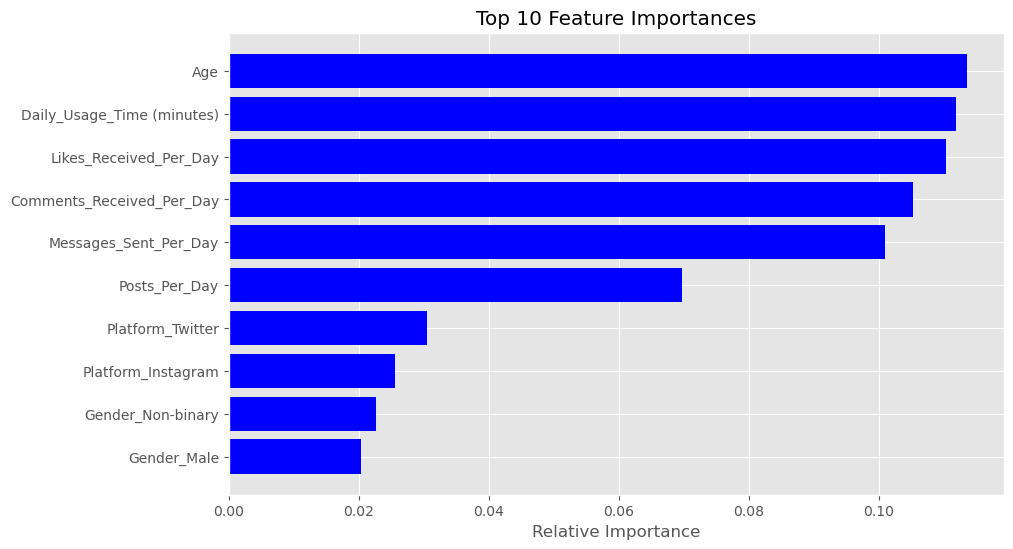

In [11]:
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
top_10_features = feature_importances['Feature'].head(10).values

# Print the top 10 features
print("Top 10 Important Features:")
print(feature_importances.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.barh(feature_importances.head(10)['Feature'], feature_importances.head(10)['Importance'], color='b', align='center')
plt.gca().invert_yaxis()
plt.xlabel('Relative Importance')
plt.show()

In [12]:
# Reduce the data to top 10 features
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

# Apply scaling again to the reduced feature set
X_train_top10_scaled = scaler.fit_transform(X_train_top10)
X_test_top10_scaled = scaler.transform(X_test_top10)

# Retrain the RandomForestClassifier with top 10 features
rf_classifier_top10 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_top10.fit(X_train_top10_scaled, y_train)

# Make predictions
y_pred_top10 = rf_classifier_top10.predict(X_test_top10_scaled)

In [13]:
accuracy_top10 = accuracy_score(y_test, y_pred_top10)
print(f"\nAccuracy with Top 10 Features: {accuracy_top10:.2f}")
print("Classification Report with Top 10 Features:")
print(classification_report(y_test, y_pred_top10))
print("Confusion Matrix with Top 10 Features:")
print(confusion_matrix(y_test, y_pred_top10))


Accuracy with Top 10 Features: 0.95
Classification Report with Top 10 Features:
              precision    recall  f1-score   support

       Anger       0.90      1.00      0.95         9
     Anxiety       1.00      0.95      0.98        21
     Boredom       1.00      0.88      0.93        16
   Happiness       0.86      1.00      0.92        12
     Neutral       0.96      1.00      0.98        26
     Sadness       0.92      0.86      0.89        14

    accuracy                           0.95        98
   macro avg       0.94      0.95      0.94        98
weighted avg       0.95      0.95      0.95        98

Confusion Matrix with Top 10 Features:
[[ 9  0  0  0  0  0]
 [ 0 20  0  1  0  0]
 [ 0  0 14  0  1  1]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 26  0]
 [ 1  0  0  1  0 12]]
